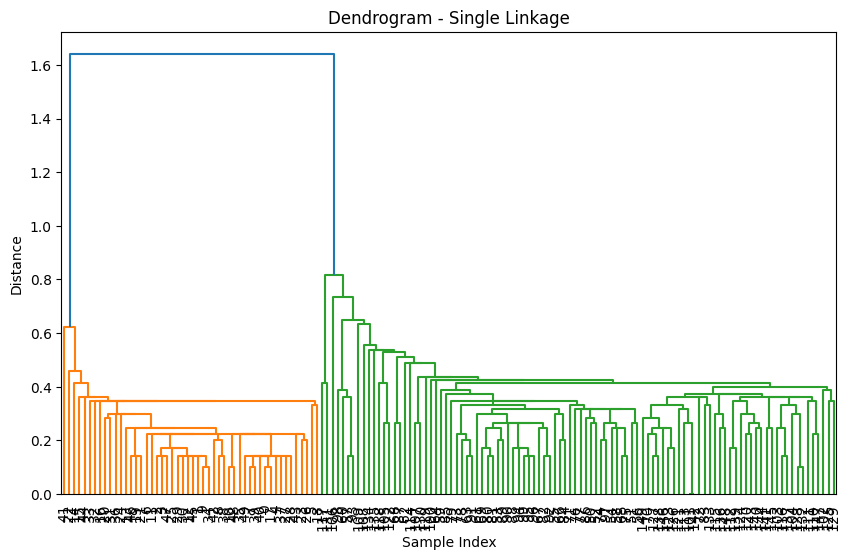

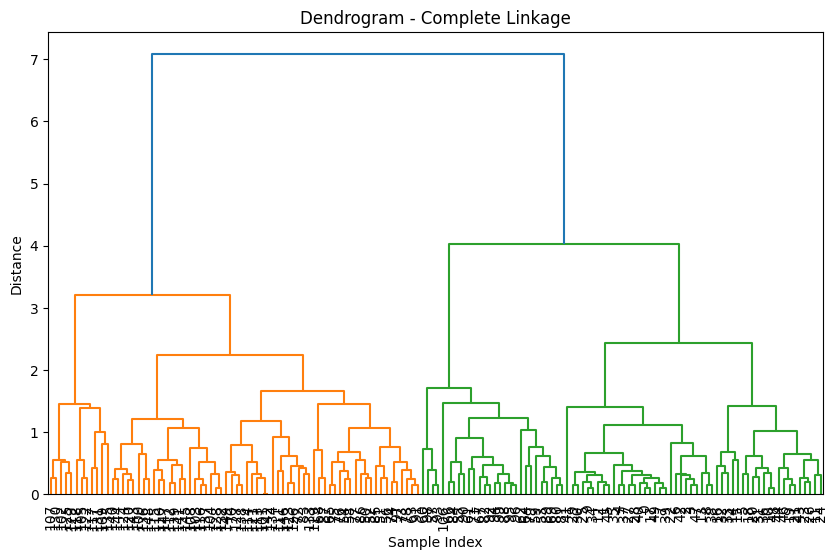

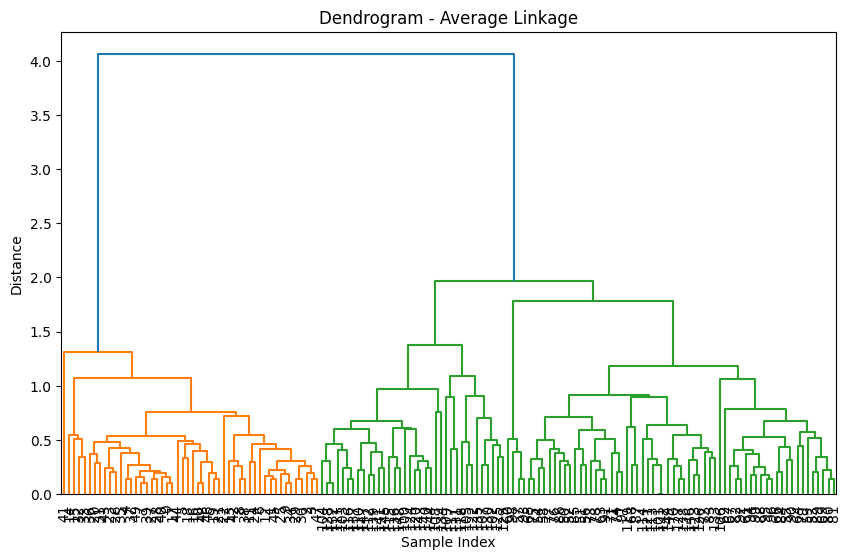

Centroids for Single Linkage:
[[6.23061224 2.85306122 4.87244898 1.66734694]
 [5.006      3.428      1.462      0.246     ]
 [7.8        3.8        6.55       2.1       ]]

Centroids for Complete Linkage:
[[6.54583333 2.96388889 5.27361111 1.85      ]
 [5.006      3.428      1.462      0.246     ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]

Centroids for Average Linkage:
[[5.9296875  2.7578125  4.4109375  1.4390625 ]
 [5.006      3.428      1.462      0.246     ]
 [6.85277778 3.075      5.78611111 2.09722222]]



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features only (excluding class labels)

# Convert to DataFrame for better visualization if needed
iris_df = pd.DataFrame(X, columns=iris.feature_names)

# Define a function to plot dendrograms for different linkage methods
def plot_dendrogram_with_indices(linkage_matrix, title):
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=10)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Generate linkage matrices for different methods
linkage_methods = ['single', 'complete', 'average']  # Removed 'centroid'
linkage_matrices = {method: linkage(X, method=method) for method in linkage_methods}

# Plot dendrograms for each linkage method using sample indices
for method, matrix in linkage_matrices.items():
    plot_dendrogram_with_indices(matrix, f'Dendrogram - {method.capitalize()} Linkage')

# Define the optimal number of clusters (visual inspection suggests 3 clusters)
optimal_clusters = 3

# Now, let's apply Agglomerative Clustering with the determined optimal number of clusters
labels_per_method = {}
centroids_per_method = {}

for method in linkage_methods:
    clustering = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=method)
    labels = clustering.fit_predict(X)
    labels_per_method[method] = labels

    # Calculate centroids for each cluster
    centroids = []
    for cluster in range(optimal_clusters):
        cluster_points = X[labels == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    
    centroids_per_method[method] = np.array(centroids)

# Display the centroids for each method
for method, centroids in centroids_per_method.items():
    print(f"Centroids for {method.capitalize()} Linkage:")
    print(centroids)
    print()

# Display the first few rows of the DataFrame with cluster labels
iris_df.head()
